In [12]:
import pandas as pd
import numpy as np
import math
from time import sleep as fallasleep
import os, sys

In [8]:
import krakenex
from pykrakenapi import KrakenAPI

In [14]:
color_box = ['#1f77b4','#ff7f0e','#2ca02c','#d62728',
             '#9467bd','#8c564b','#e377c2','#7f7f7f',
             '#bcdb22','#17becf']

In [20]:
api = krakenex.API()
k = KrakenAPI(api)
coins = ["ETH", "BTC", "XRP", "ADA", "DOT"]
gapmin= 1440
coins = [coin+"USD" for coin in coins]
df = {}
colormapper = {}
for _,coin in enumerate(coins):
    data, last = k.get_ohlc_data(coin, interval = gapmin, ascending = True)
    df[coin]=data.drop(['time', 'count'], axis=1)
    colormapper[coin] = color_box[_]
    fallasleep(1)


##### Recall from `causation.ipynb` that price of the Bitcoin can be predicted with using all other 4 coins.

In [23]:
df["BTCUSD"].head(3)

,open,high,low,close,vwap,volume
dtime,,,,,,
2019-11-20,8124.9,8220.0,8030.0,8083.1,8104.1,3329.920133
2019-11-21,8083.1,8116.5,7399.0,7619.1,7703.1,7275.881648
2019-11-22,7619.1,7719.3,6761.0,7284.8,7225.4,13608.745363


In [73]:
df["BTCUSD"] = df["BTCUSD"].apply(np.log).diff().dropna()

In [74]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [75]:
Y = df["BTCUSD"]['close'].values
X = df["BTCUSD"].drop(['close'], axis=1).values

In [76]:
print(X.shape, Y.shape)

(719, 5) (719,)


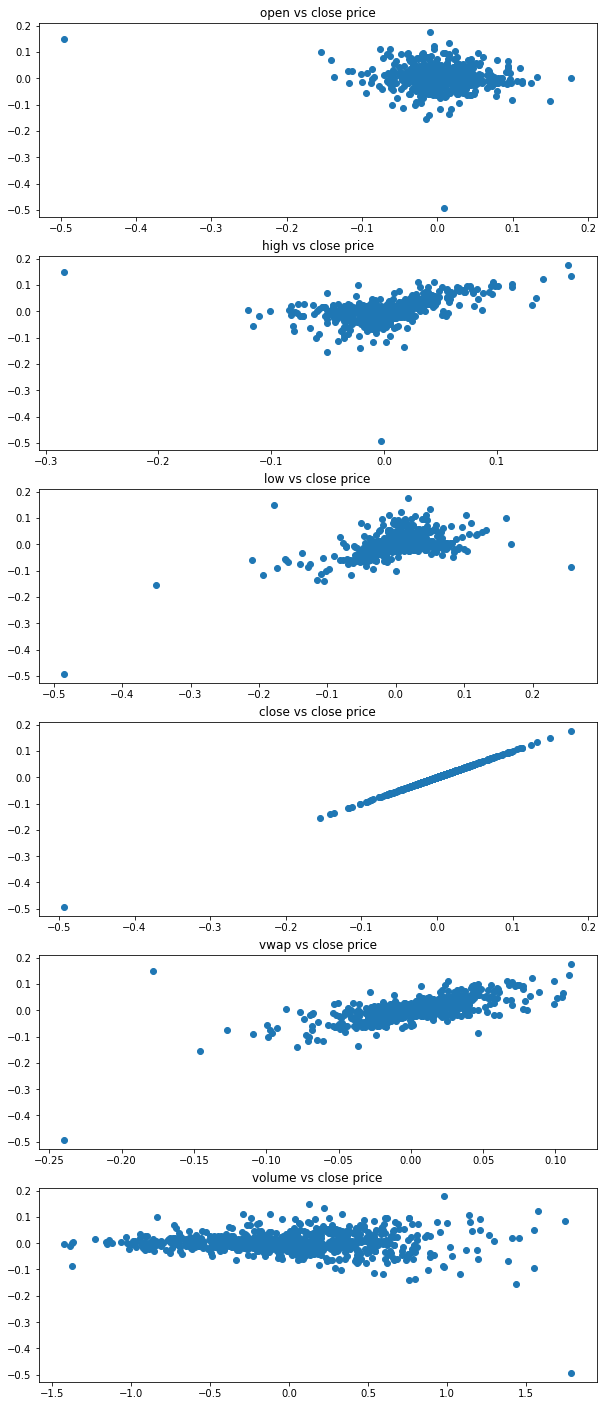

In [77]:
# fig = plt.figure(figsize=(8,6))
fig, ax = plt.subplots(len(df["BTCUSD"].columns),1,figsize=(10,25))
for _,col in enumerate(df["BTCUSD"]):
    ax[_].scatter(df["BTCUSD"][col], Y)
    ax[_].set_title(f"{col} vs close price")
#     ax[_].set_ylabel("rate of return")
#     ax[_].set_xlabel("Date")
#     ax[_].grid()
# fig.autofmt_xdate()
plt.show()

##### volume doesn't impact the price

In [78]:
lm = linear_model.LinearRegression()


In [87]:
Y = df["BTCUSD"]['close'].values
X = df["BTCUSD"].drop(['close', 'volume'], axis=1).values

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [89]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(575, 4) (144, 4) (575,) (144,)


In [90]:
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Predictions: {predictions}")
print(f"R^2 value:   {lm.score(X, Y)}")
print(f"coedd:       {lm.coef_}")
print(f"intercept:   {lm.intercept_}")

Predictions: [ 6.92173023e-02  4.08768127e-03 -9.59640867e-03  3.47017148e-03
  1.37750088e-02  1.30148128e-02 -4.28104496e-02  2.36400962e-02
  3.89983267e-02  5.64529363e-03  1.63220619e-01 -3.21037668e-02
  1.26191516e-03  1.07140767e-02  3.16135786e-03  2.71838163e-03
  3.08415250e-02  4.66999825e-02  1.22791560e-02 -2.49090962e-02
 -4.09753071e-03  1.80916307e-02  7.71329150e-03  4.71056891e-02
 -3.86778253e-02 -5.54265502e-04  1.66913913e-02  6.77498094e-02
 -5.48697745e-03 -1.51932262e-02 -1.23456195e-01  3.00189917e-02
  5.91951910e-03 -5.20659477e-04  1.19524549e-02  6.90774741e-03
 -1.42209944e-03  3.92011118e-02 -6.74236150e-03 -1.40747452e-02
  5.33780289e-03  1.27214308e-02 -3.25031997e-02  3.39158797e-02
  2.95952382e-02 -6.59394856e-03 -2.85726482e-02  6.50543381e-03
 -4.46809979e-03  2.08822625e-03  1.33682920e-02  2.45629051e-02
  2.08879516e-02 -2.43154446e-02 -2.05237868e-02 -2.75694846e-02
 -6.26114039e-03 -3.91777407e-02  4.97225043e-02  3.05622556e-02
 -4.49928150

In [91]:
df["BTCUSD"].head(3)

,open,high,low,close,vwap,volume
dtime,,,,,,
2019-11-21,-0.005158,-0.012671,-0.081840,-0.059117,-0.050747,0.781617
2019-11-22,-0.059117,-0.050175,-0.090174,-0.044868,-0.064020,0.626148
2019-11-23,-0.044882,-0.050398,0.049656,0.005175,0.002530,-1.372126


In [92]:
df["BTCUSD"].index[-len(y_test):]

DatetimeIndex(['2021-06-18', '2021-06-19', '2021-06-20', '2021-06-21',
               '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
               '2021-06-26', '2021-06-27',
               ...
               '2021-10-30', '2021-10-31', '2021-11-01', '2021-11-02',
               '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06',
               '2021-11-07', '2021-11-08'],
              dtype='datetime64[ns]', name='dtime', length=144, freq='1440T')

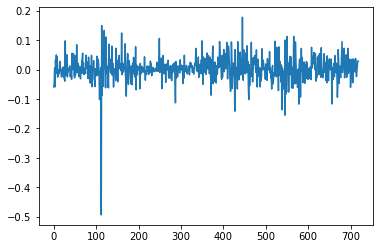

In [93]:
plt.plot(df["BTCUSD"]['close'].values)

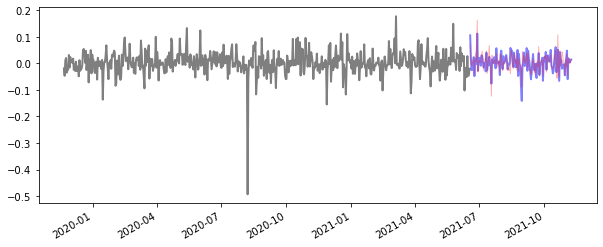

In [94]:
fig = plt.figure(figsize=(10,4))
plt.plot(df["BTCUSD"].index[:len(y_train)], y_train, color='black', alpha=0.5, lw=2)
plt.plot(df["BTCUSD"].index[-len(y_test):], y_test, color='blue', alpha=0.5, lw=2)
plt.plot(df["BTCUSD"].index[-len(y_test):], predictions, color='red', alpha=0.3, lw=1)
fig.autofmt_xdate()

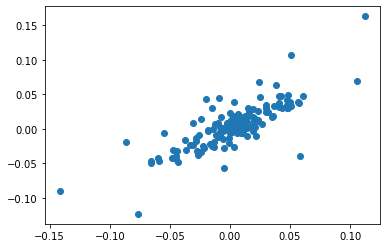

In [95]:
plt.scatter(y_test, predictions)